In [95]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [3]:
profiles = pd.read_csv("data/profiles.csv")

In [4]:
profiles.head(3)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,orientation,sex,smokes,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,NaN,transportation,"south san francisco, california",straight,m,sometimes,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,"oakland, california",straight,m,no,single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,NaN,NaN,"san francisco, california",straight,m,no,available


In [92]:
dict(profiles['age'].value_counts(dropna=False))

{18: 309,
 19: 611,
 20: 953,
 21: 1282,
 22: 1934,
 23: 2592,
 24: 3242,
 25: 3531,
 26: 3724,
 27: 3685,
 28: 3583,
 29: 3295,
 30: 3149,
 31: 2735,
 32: 2587,
 33: 2206,
 34: 1902,
 35: 1755,
 36: 1583,
 37: 1427,
 38: 1330,
 39: 1172,
 40: 1030,
 41: 980,
 42: 1072,
 43: 858,
 44: 708,
 45: 643,
 46: 578,
 47: 529,
 48: 481,
 49: 459,
 50: 437,
 51: 350,
 52: 344,
 53: 252,
 54: 267,
 55: 265,
 56: 271,
 57: 256,
 58: 197,
 59: 221,
 60: 195,
 61: 176,
 62: 167,
 63: 138,
 64: 113,
 65: 109,
 66: 105,
 67: 66,
 68: 59,
 69: 31,
 109: 1,
 110: 1}

In [5]:
dict(profiles['body_type'].value_counts())

{'a little extra': 2629,
 'athletic': 11819,
 'average': 14652,
 'curvy': 3924,
 'fit': 12711,
 'full figured': 1009,
 'jacked': 421,
 'overweight': 444,
 'rather not say': 198,
 'skinny': 1777,
 'thin': 4711,
 'used up': 355}

In [93]:
profiles['body_type'].isnull().values.sum()

5296

In [6]:
dict(profiles['diet'].value_counts())

{'anything': 6183,
 'halal': 11,
 'kosher': 11,
 'mostly anything': 16585,
 'mostly halal': 48,
 'mostly kosher': 86,
 'mostly other': 1007,
 'mostly vegan': 338,
 'mostly vegetarian': 3444,
 'other': 331,
 'strictly anything': 5113,
 'strictly halal': 18,
 'strictly kosher': 18,
 'strictly other': 452,
 'strictly vegan': 228,
 'strictly vegetarian': 875,
 'vegan': 136,
 'vegetarian': 667}

In [94]:
profiles['diet'].isnull().values.sum()

24395

In [87]:
dict(profiles['drinks'].value_counts())

{'desperately': 322,
 'not at all': 3267,
 'often': 5164,
 'rarely': 5957,
 'socially': 41780,
 'very often': 471}

In [95]:
profiles['drinks'].isnull().values.sum()

2985

In [85]:
dict(profiles['drugs'].value_counts())

{'never': 37724, 'often': 410, 'sometimes': 7732}

In [97]:
profiles['drugs'].isnull().values.sum()

14080

In [83]:
dict(profiles['education'].value_counts())

{'college/university': 801,
 'dropped out of college/university': 995,
 'dropped out of high school': 102,
 'dropped out of law school': 18,
 'dropped out of masters program': 140,
 'dropped out of med school': 12,
 'dropped out of ph.d program': 127,
 'dropped out of space camp': 523,
 'dropped out of two-year college': 191,
 'graduated from college/university': 23959,
 'graduated from high school': 1428,
 'graduated from law school': 1122,
 'graduated from masters program': 8961,
 'graduated from med school': 446,
 'graduated from ph.d program': 1272,
 'graduated from space camp': 657,
 'graduated from two-year college': 1531,
 'high school': 96,
 'law school': 19,
 'masters program': 136,
 'med school': 11,
 'ph.d program': 26,
 'space camp': 58,
 'two-year college': 222,
 'working on college/university': 5712,
 'working on high school': 87,
 'working on law school': 269,
 'working on masters program': 1683,
 'working on med school': 212,
 'working on ph.d program': 983,
 'working o

In [99]:
profiles['education'].isnull().values.sum()

6628

In [81]:
dict(profiles['ethnicity'].value_counts())

{'asian': 6134,
 'asian, black': 59,
 'asian, black, hispanic / latin': 2,
 'asian, black, hispanic / latin, other': 2,
 'asian, black, hispanic / latin, white': 2,
 'asian, black, hispanic / latin, white, other': 1,
 'asian, black, indian': 1,
 'asian, black, indian, hispanic / latin, other': 1,
 'asian, black, native american': 9,
 'asian, black, native american, hispanic / latin': 2,
 'asian, black, native american, hispanic / latin, white': 2,
 'asian, black, native american, indian': 1,
 'asian, black, native american, indian, hispanic / latin, white, other': 1,
 'asian, black, native american, indian, pacific islander, hispanic / latin': 1,
 'asian, black, native american, indian, pacific islander, white': 1,
 'asian, black, native american, other': 2,
 'asian, black, native american, pacific islander': 2,
 'asian, black, native american, pacific islander, other': 1,
 'asian, black, native american, pacific islander, white': 3,
 'asian, black, native american, pacific islander, w

In [100]:
profiles['ethnicity'].isnull().values.sum()

5680

In [79]:
dict(profiles['height'].value_counts(dropna=False))

{1.0: 1,
 3.0: 1,
 4.0: 1,
 6.0: 1,
 8.0: 1,
 9.0: 1,
 26.0: 1,
 36.0: 11,
 37.0: 2,
 42.0: 1,
 43.0: 2,
 47.0: 1,
 48.0: 2,
 49.0: 1,
 50.0: 2,
 51.0: 1,
 52.0: 1,
 53.0: 5,
 54.0: 3,
 55.0: 6,
 56.0: 8,
 57.0: 17,
 58.0: 53,
 59.0: 212,
 60.0: 791,
 61.0: 1090,
 62.0: 2244,
 63.0: 2767,
 64.0: 3865,
 65.0: 3794,
 66.0: 4759,
 67.0: 5354,
 68.0: 5449,
 69.0: 5179,
 70.0: 6074,
 71.0: 4826,
 72.0: 5315,
 73.0: 2815,
 74.0: 2547,
 75.0: 1382,
 76.0: 783,
 77.0: 280,
 78.0: 132,
 79.0: 57,
 80.0: 27,
 81.0: 11,
 82.0: 11,
 83.0: 12,
 84.0: 9,
 85.0: 1,
 86.0: 1,
 87.0: 1,
 88.0: 2,
 89.0: 1,
 90.0: 1,
 91.0: 3,
 92.0: 1,
 93.0: 1,
 94.0: 3,
 95.0: 20,
 nan: 3}

In [78]:
dict(profiles['income'].value_counts(dropna=False))

{nan: 48442,
 20000.0: 2952,
 30000.0: 1048,
 40000.0: 1005,
 50000.0: 975,
 60000.0: 736,
 70000.0: 707,
 80000.0: 1111,
 100000.0: 1621,
 150000.0: 631,
 250000.0: 149,
 500000.0: 48,
 1000000.0: 521}

In [91]:
dict(profiles['job'].value_counts())

{'artistic / musical / writer': 4439,
 'banking / financial / real estate': 2266,
 'clerical / administrative': 805,
 'computer / hardware / software': 4709,
 'construction / craftsmanship': 1021,
 'education / academia': 3513,
 'entertainment / media': 2250,
 'executive / management': 2373,
 'hospitality / travel': 1364,
 'law / legal services': 1381,
 'medicine / health': 3680,
 'military': 204,
 'other': 7589,
 'political / government': 708,
 'rather not say': 436,
 'retired': 250,
 'sales / marketing / biz dev': 4391,
 'science / tech / engineering': 4848,
 'student': 4882,
 'transportation': 366,
 'unemployed': 273}

In [101]:
profiles['job'].isnull().values.sum()

8198

In [89]:
dict(profiles['location'].value_counts())

{'alameda, california': 910,
 'albany, california': 233,
 'amsterdam, netherlands': 1,
 'arcadia, california': 1,
 'asheville, north carolina': 1,
 'ashland, california': 1,
 'astoria, new york': 1,
 'atherton, california': 45,
 'atlanta, georgia': 2,
 'austin, texas': 1,
 'bayshore, california': 3,
 'bellingham, washington': 1,
 'bellwood, illinois': 1,
 'belmont, california': 243,
 'belvedere tiburon, california': 57,
 'benicia, california': 203,
 'berkeley, california': 4212,
 'billings, montana': 1,
 'boise, idaho': 1,
 'bolinas, california': 8,
 'bonaduz, switzerland': 1,
 'boston, massachusetts': 2,
 'boulder, colorado': 1,
 'brea, california': 1,
 'brisbane, california': 38,
 'brooklyn, new york': 3,
 'burlingame, california': 361,
 'cambridge, massachusetts': 1,
 'campbell, california': 1,
 'canyon country, california': 1,
 'canyon, california': 1,
 'castro valley, california': 345,
 'chicago, illinois': 6,
 'chico, california': 1,
 'cincinnati, ohio': 1,
 'colma, california': 

In [102]:
profiles['location'].isnull().values.sum()

0

In [15]:
dict(profiles['orientation'].value_counts())

{'bisexual': 2767, 'gay': 5573, 'straight': 51606}

In [103]:
profiles['orientation'].isnull().values.sum()

0

In [16]:
dict(profiles['sex'].value_counts())

{'f': 24117, 'm': 35829}

In [104]:
profiles['sex'].isnull().values.sum()

0

In [17]:
dict(profiles['smokes'].value_counts())

{'no': 43896,
 'sometimes': 3787,
 'trying to quit': 1480,
 'when drinking': 3040,
 'yes': 2231}

In [105]:
profiles['smokes'].isnull().values.sum()

5512

In [18]:
dict(profiles['status'].value_counts())

{'available': 1865,
 'married': 310,
 'seeing someone': 2064,
 'single': 55697,
 'unknown': 10}

In [106]:
profiles['status'].isnull().values.sum()

0

In [5]:
categ_vars = ['body_type', 'diet', 'drinks', 'drugs', 'education',
              'ethnicity', 'job', 'location', 'orientation', 'sex',
              'smokes', 'status']

In [6]:
categ_dummies = pd.DataFrame()
for var in categ_vars:
    dummies = pd.get_dummies(profiles[var])
    categ_dummies = pd.concat([categ_dummies, dummies], axis = 1)
categ_dummies = categ_dummies.values

In [7]:
num_profiles = profiles[['age', 'height']]
num_profiles['height'][np.isnan(num_profiles['height'])] = np.mean(num_profiles['height'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
num_profiles = normalize(num_profiles)

In [9]:
train = np.concatenate([num_profiles, categ_dummies], axis=1)

In [10]:
kmeans = KMeans(n_clusters=, random_state=0).fit(train)

In [149]:
kmeans.cluster_centers_

array([[  4.17431093e-01,   9.01110939e-01,   1.28167877e-01, ...,
          3.47054076e-02,   9.21065375e-01,   3.22841001e-04],
       [  3.98492928e-01,   9.13237721e-01,   3.51308625e-02, ...,
          3.53065168e-02,   9.17969436e-01,   1.75654312e-04],
       [  3.96398482e-01,   9.13767482e-01,   4.09717933e-02, ...,
          7.98847025e-02,   8.35701050e-01,  -1.25496401e-17],
       ..., 
       [  4.36789402e-01,   8.94454204e-01,   1.81326116e-02, ...,
          2.44925575e-02,   9.62922869e-01,  -2.20635142e-17],
       [  4.07823086e-01,   9.07802045e-01,   2.22044605e-16, ...,
          1.44906947e-02,   9.62210541e-01,   1.42065634e-04],
       [  4.10042373e-01,   9.06935632e-01,   7.32308860e-02, ...,
          3.43388351e-02,   9.38721305e-01,  -1.47180445e-17]])

In [32]:
for i in range(kmeans.n_clusters):
    print(np.sum(np.square(train[kmeans.labels_ == 0, ] - 
                           kmeans.cluster_centers_[0])) / )

5.3921511479263415

In [79]:
profiles['full_data'] = 'Yes'

In [80]:
cluster0 = profiles.iloc[kmeans.labels_ == 0, ]
cluster0['full_data'] = 'No'

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
tmp = pd.concat([profiles, cluster0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1134b8320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116a46390>], dtype=object)

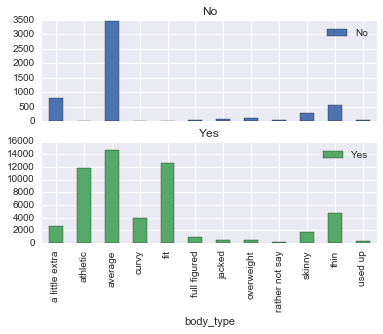

In [144]:
tmp[['body_type', 'full_data']].groupby(['body_type','full_data']).size().unstack(1).plot(kind='bar', subplots=True)

In [132]:
tmp[['body_type', 'full_data']]

,body_type,full_data
0,a little extra,Yes
1,average,Yes
2,thin,Yes
3,thin,Yes
4,athletic,Yes
5,average,Yes
6,fit,Yes
7,average,Yes
8,NaN,Yes
9,athletic,Yes
